In [1]:
from GAN import *
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torchvision.transforms.functional as F

import medmnist
from medmnist import INFO

import torchvision.transforms as transforms
from torch.utils.data import ConcatDataset
from torch.utils.data import DataLoader, Subset

In [2]:
batch_size = 16
noise = torch.randn(batch_size, Z_DIM)
labels = torch.randint(0, NUM_CLASSES, (batch_size,))

gen = Generator()
disc = Discriminator()

fake_imgs = gen(noise, labels)
validity = disc(fake_imgs, labels)

print("Generated images:", fake_imgs.shape)
print("Validity scores:", validity.shape)

Generated images: torch.Size([16, 3, 28, 28])
Validity scores: torch.Size([16, 1])


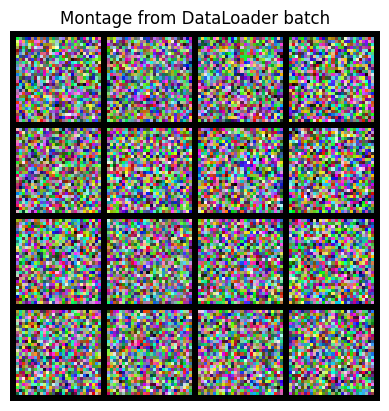

In [3]:
grid = make_grid(fake_imgs[:batch_size], nrow=4)  # you can adjust how many to show

# Display
plt.imshow(F.to_pil_image(grid))
plt.axis('off')
plt.title("Montage from DataLoader batch")
plt.show()

## Dataset e Dataloader

In [4]:
data_flag = 'bloodmnist'
download = True
BATCH_SIZE = 128

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [5]:
# preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)  # Normalize to [-1, 1]
])

# Load all splits
train = DataClass(split='train', transform=transform, download=True)
val = DataClass(split='val', transform=transform, download=True)
test = DataClass(split='test', transform=transform, download=True)

# Combine them into a single dataset
full_dataset = ConcatDataset([train, val, test])
full_dataloader = DataLoader(full_dataset, batch_size=128, shuffle=True)

train_dataloader = DataLoader(train, batch_size=128, shuffle=True)
val_dataloader = DataLoader(val, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test, batch_size=128, shuffle=True)

In [6]:
# Replace with your dataset
dataset = full_dataset
dataloader = full_dataloader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cgan = ConditionalGAN(generator=gen, discriminator=disc, dataloader=dataloader, img_channels=3, img_size=28, z_dim=100, num_classes=8, embed_dim=50)

cgan = cgan.to(device)
cgan.train(num_epochs=50, learning_rate=0.0001, save_interval=10, output_dir='cgan_output')

[Epoch 1/50] [Batch 0/134] [D loss: 0.6980] [G loss: 0.7090]
[Epoch 1/50] [Batch 100/134] [D loss: 0.6030] [G loss: 0.7982]
[Epoch 2/50] [Batch 0/134] [D loss: 0.5208] [G loss: 0.7121]
[Epoch 2/50] [Batch 100/134] [D loss: 0.4499] [G loss: 1.2015]
[Epoch 3/50] [Batch 0/134] [D loss: 0.5884] [G loss: 0.7877]
[Epoch 3/50] [Batch 100/134] [D loss: 0.5178] [G loss: 1.1568]
[Epoch 4/50] [Batch 0/134] [D loss: 0.4624] [G loss: 1.2488]
[Epoch 4/50] [Batch 100/134] [D loss: 0.5162] [G loss: 0.9366]
[Epoch 5/50] [Batch 0/134] [D loss: 0.5677] [G loss: 1.2464]
[Epoch 5/50] [Batch 100/134] [D loss: 0.6226] [G loss: 0.4841]
[Epoch 6/50] [Batch 0/134] [D loss: 0.5814] [G loss: 0.6473]
[Epoch 6/50] [Batch 100/134] [D loss: 0.5982] [G loss: 2.1291]
[Epoch 7/50] [Batch 0/134] [D loss: 0.5134] [G loss: 1.3939]
[Epoch 7/50] [Batch 100/134] [D loss: 0.4912] [G loss: 0.8683]
[Epoch 8/50] [Batch 0/134] [D loss: 0.5222] [G loss: 0.6960]
[Epoch 8/50] [Batch 100/134] [D loss: 0.4653] [G loss: 0.9317]
[Epoch 9

In [14]:
cgan.generate_samples(2, 40, 'cgan_images')